In [1]:
import pandas as pd
import numpy as np

In [2]:
df =pd.read_csv('data/SBA_no_missing_data.csv')

In [3]:
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'GrAppv', 'MIS_Status'],
      dtype='object')

In [4]:
df =df[['ApprovalDate','Term','NoEmp','FranchiseCode','NAICS', 'ApprovalFY','NewExist', 'LowDoc', 'GrAppv', 'CreateJob', 'RetainedJob','UrbanRural', 'RevLineCr','MIS_Status']]


In [5]:
df['ApprovalDate'].unique

<bound method Series.unique of 0         28-Feb-97
1         28-Feb-97
2         28-Feb-97
3         28-Feb-97
4         28-Feb-97
            ...    
621621    27-Feb-97
621622    27-Feb-97
621623    27-Feb-97
621624    27-Feb-97
621625    27-Feb-97
Name: ApprovalDate, Length: 621626, dtype: object>

In [6]:
try:
    pd.to_datetime(df['ApprovalDate'], format='%d-%b-%y', errors='raise')
    print("Toutes les dates sont conformes au format spécifié.")
except ValueError as e:
    print('Erreurs détectées dans les dates :')
    print(e)

Toutes les dates sont conformes au format spécifié.


In [7]:
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], format='%d-%b-%y')


In [8]:
df['ApprovalDate'].unique

<bound method Series.unique of 0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
621621   1997-02-27
621622   1997-02-27
621623   1997-02-27
621624   1997-02-27
621625   1997-02-27
Name: ApprovalDate, Length: 621626, dtype: datetime64[ns]>

In [9]:
df['Term'].nunique()

400

In [10]:
if df['Term'].dtype == 'int64':
    print("Toutes les données dans la colonne sont de type int64.")
else:
    print("Les données dans la colonne ne sont pas toutes de type int64.")

Toutes les données dans la colonne sont de type int64.


In [11]:
valeur_min = df['Term'].min()
valeur_max = df['Term'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de term :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)

Intervalle des valeurs de term : 449
valeur_min 0
valeur_max 449


In [12]:
valeur_min = df['NoEmp'].min()
valeur_max = df['NoEmp'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de NoEmp :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)

Intervalle des valeurs de NoEmp : 9999
valeur_min 0
valeur_max 9999


In [13]:
df['FranchiseCode'].unique

valeur_min = df['FranchiseCode'].min()
valeur_max = df['FranchiseCode'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de FranchiseCode :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)

Intervalle des valeurs de FranchiseCode : 99999
valeur_min 0
valeur_max 99999


In [14]:
print(df['FranchiseCode'].astype)



<bound method NDFrame.astype of 0         1
1         1
2         1
3         1
4         1
         ..
621621    1
621622    1
621623    1
621624    1
621625    1
Name: FranchiseCode, Length: 621626, dtype: int64>


In [15]:
# Modifie le type des données pour effectuer une tranformation
df['FranchiseCode'] = df['FranchiseCode'].astype(str)

def transform_franchise(code):
    if code == '0' or code == '1':
        return 'No franchise'
    else:
        return 'Franchise'
    
df.loc[:, 'FranchiseCode'] = df['FranchiseCode'].apply(transform_franchise)

# Affiche les valeurs uniques de la colonne
print(df['FranchiseCode'].unique())

['No franchise' 'Franchise']


In [16]:
df['NAICS'].unique

<bound method Series.unique of 0         451120
1         722410
2         621210
3              0
4              0
           ...  
621621         0
621622    451130
621623    332321
621624         0
621625         0
Name: NAICS, Length: 621626, dtype: int64>

In [17]:
# Conserve que les deux premiers chiffres du code
df['NAICS'] = df['NAICS'].astype(str).str[:2]

In [18]:
df['NAICS'].unique

<bound method Series.unique of 0         45
1         72
2         62
3          0
4          0
          ..
621621     0
621622    45
621623    33
621624     0
621625     0
Name: NAICS, Length: 621626, dtype: object>

In [19]:
# Creer le nom des secteurs de NAICS
secteurs = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31-33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44-45': 'Retail trade',
    '48-49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}

In [20]:
# Mappe les valeurs de la colonne 'NAICS' avec le dict
df['NAICS'] = df['NAICS'].map(secteurs)


print(df['NAICS'].head)
print(df['NAICS'].unique)

<bound method NDFrame.head of 0                                       NaN
1           Accommodation and food services
2         Health care and social assistance
3                                       NaN
4                                       NaN
                        ...                
621621                                  NaN
621622                                  NaN
621623                                  NaN
621624                                  NaN
621625                                  NaN
Name: NAICS, Length: 621626, dtype: object>
<bound method Series.unique of 0                                       NaN
1           Accommodation and food services
2         Health care and social assistance
3                                       NaN
4                                       NaN
                        ...                
621621                                  NaN
621622                                  NaN
621623                                  NaN
621624         

In [21]:
# Supprime les lignes avec des valeurs NaN dans la colonne 'NAICS'
df.dropna(subset=['NAICS'], inplace=True)
df['NAICS'].unique()


array(['Accommodation and food services',
       'Health care and social assistance',
       'Other services (except public administration)', 'Construction',
       'Wholesale trade', 'Educational services',
       'Real estate and rental and leasing',
       'Professional, scientific, and technical services', 'Information',
       'Finance and insurance',
       'Administrative and support and waste management and remediation services',
       'Arts, entertainment, and recreation',
       'Agriculture, forestry, fishing and hunting',
       'Public administration', 'Utilities',
       'Management of companies and enterprises',
       'Mining, quarrying, and oil and gas extraction'], dtype=object)

In [22]:
df = df.rename(columns= {'NAICS' : 'Naics'})

In [23]:
df.loc[:, 'UrbanRural'] = df['UrbanRural'].astype(str)

In [24]:
print(type(df['Naics']))

<class 'pandas.core.series.Series'>


In [25]:
df.columns

Index(['ApprovalDate', 'Term', 'NoEmp', 'FranchiseCode', 'Naics', 'ApprovalFY',
       'NewExist', 'LowDoc', 'GrAppv', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'RevLineCr', 'MIS_Status'],
      dtype='object')

In [26]:
print(df['ApprovalFY'].unique)

# Vérifie le type de données de la colonne
if df['ApprovalFY'].dtype == 'int64':
    print("Toutes les données dans la colonne sont de type int64.")
else:
    print("Les données dans la colonne ne sont pas toutes de type int64.")

<bound method Series.unique of 1         1997
2         1997
7         1997
8         1997
10        1997
          ... 
621606    1997
621607    1997
621608    1997
621609    1997
621616    1997
Name: ApprovalFY, Length: 321339, dtype: int64>
Toutes les données dans la colonne sont de type int64.


In [27]:
# Groupe les données par année dans la colonne 'ApprovalFY'
grouped_by_year = df.groupby('ApprovalFY')

# Affiche les années groupées
for year, _ in grouped_by_year:
    print("Année :", year)

Année : 1984
Année : 1987
Année : 1988
Année : 1989
Année : 1990
Année : 1991
Année : 1992
Année : 1993
Année : 1994
Année : 1995
Année : 1996
Année : 1997
Année : 1998
Année : 1999
Année : 2000
Année : 2001
Année : 2002
Année : 2003
Année : 2004
Année : 2005
Année : 2006
Année : 2007
Année : 2008
Année : 2009
Année : 2010
Année : 2011
Année : 2012
Année : 2013
Année : 2014


In [28]:
df['NewExist'].unique

<bound method Series.unique of 1         2.0
2         1.0
7         2.0
8         2.0
10        2.0
         ... 
621606    2.0
621607    1.0
621608    2.0
621609    1.0
621616    1.0
Name: NewExist, Length: 321339, dtype: float64>

In [29]:
# Groupe les données par année dans la colonne 'ApprovalFY'
grouped_by_donnees = df.groupby('NewExist')

# Affiche les années groupées
for donnees, _ in grouped_by_donnees:
    print("donnees :", donnees)

donnees : 0.0
donnees : 1.0
donnees : 2.0


In [30]:
# Fonction qui transforme les valeurs de NewExist en 'Existing business' ou 'New business'
def transform_newexist(code):
    if code == 1.0:
        return 'Existing business'
    elif code == 2.0:
        return 'New business'
    else:
        return np.nan

# Applique la fonction à la colonne NewExist
df['NewExist'] = df['NewExist'].apply(transform_newexist)


# Affiche les valeurs uniques de la colonne après transformation
print(df['NewExist'].unique())

['New business' 'Existing business' nan]


In [31]:
# Supprime les valeurs nan
df.dropna(subset=['NewExist'], inplace=True)
print(df['NewExist'].unique())

['New business' 'Existing business']


In [32]:
# Groupe les données par année dans la colonne 'ApprovalFY'
grouped_by_donnees = df.groupby('LowDoc')

# Affiche les années groupées
for donnees, _ in grouped_by_donnees:
    print("donnees :", donnees)

donnees : 0.0
donnees : 1.0


In [33]:
# Converti la colonne 'LowDoc' en type de données object
df.loc[:, 'LowDoc'] = df['LowDoc'].astype(str)

# Fonction qui transforme les valeurs de LowDoc en 'Existing business' ou 'New business'
def transform_LowDoc(code):
    if code == '0.0':
        return "No Loan Program"
    elif code == '1.0':
        return 'Yes Loan Program'

# Applique la fonction à la colonne LowDoc 
df.loc[:, 'LowDoc'] = df['LowDoc'].apply(transform_LowDoc)

# Affiche les valeurs uniques de la colonne après transformation
print(df['LowDoc'].unique())

['Yes Loan Program' 'No Loan Program']


In [34]:
df['LowDoc'].dtype

dtype('O')

In [35]:
print(df['GrAppv'].unique())

# Groupe les données par année dans la colonne 'ApprovalFY'
grouped_by_donnees = df.groupby('GrAppv')

# Affiche les années groupées
for donnees, _ in grouped_by_donnees:
    print("donnees :", donnees)

[ 4000000 28700000  4500000 ...  4572000 27914500  6885000]


donnees : 20000
donnees : 40000
donnees : 50000
donnees : 70000
donnees : 80000
donnees : 95000
donnees : 100000
donnees : 120000
donnees : 130000
donnees : 150000
donnees : 160000
donnees : 170000
donnees : 190000
donnees : 200000
donnees : 210000
donnees : 220000
donnees : 230000
donnees : 250000
donnees : 260000
donnees : 270000
donnees : 280000
donnees : 290000
donnees : 300000
donnees : 310000
donnees : 320000
donnees : 330000
donnees : 330700
donnees : 340000
donnees : 350000
donnees : 360000
donnees : 370000
donnees : 380000
donnees : 390000
donnees : 400000
donnees : 407200
donnees : 410000
donnees : 420000
donnees : 430000
donnees : 440000
donnees : 450000
donnees : 460000
donnees : 461200
donnees : 470000
donnees : 480000
donnees : 490000
donnees : 500000
donnees : 510000
donnees : 510800
donnees : 520000
donnees : 530000
donnees : 540000
donnees : 550000
donnees : 560000
donnees : 570000
donnees : 573300
donnees : 575000
donnees : 580000
donnees : 590000
donnees : 600000
don

In [36]:
valeur_min = df['GrAppv'].min()
valeur_max = df['GrAppv'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de GrAppv :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)
print(df['GrAppv'].dtype)

Intervalle des valeurs de GrAppv : 499980000
valeur_min 20000
valeur_max 500000000
int64


In [37]:
print(df['CreateJob'].unique())

valeur_min = df['CreateJob'].min()
valeur_max = df['CreateJob'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de CreateJob :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)
print(df['CreateJob'].dtype)

[   0    5    4    1    8   15    3   11    2   10    7   12   25    9
   47   30    6   20   43   18   21   82   14   80   70   19   13   33
   27  150   38   97   32   17   16   40   34   36   50   28   24   35
  200   26   22   90   60   77   75   31   23  100   55   45   99   48
  120   69   42  160   29 1000   44   39   49   37  450  456   72  452
   53  451   79  454  136   63  455   76  152  225  110  453  458  457
  174   46   64  320  154   58  149  180   65  153  800  137  500   57
   54  360   56  122 1200  112   59  118   73  151   41  125   84 1711
  131   83 1618 1150  115   78  157  135  140  210  252  116  102   74
   71   62  129   85   52  144   81  179   67  171  141  124   92  101
  119  103   98  105  220   66   51   88  186  300  139  375  600  130
  264 3000  240  167   89  175  165  106   68 1118   95  250 5085   96
   86  170  400   61   94 1016]
Intervalle des valeurs de CreateJob : 5085
valeur_min 0
valeur_max 5085
int64


In [38]:

print(df['RetainedJob'].unique())

valeur_min = df['RetainedJob'].min()
valeur_max = df['RetainedJob'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de RetainedJob :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)
print(df['RetainedJob'].dtype)

[   0   23    4    6   19   10   24    1    5    3    7   12   11   17
   20    9   38    8    2   26   13   50   93   40   15   18   21   35
  150   25   45   16   14   27   34   32  257   43   47   80   70  400
   37   30   28   22   31   55   60   36   95   48   62   65  120   29
   33   71  130   81   58  160  109   75  155   39   85   90   54   44
  100   66  210   97   51   61   42   41   78   63  112   52   77   76
   46  118   67   64  125   69   56  117  171  140  105   68   53  138
  180   79  206  128   83  250   59   72   49   92   86  200   57  320
   88  104   82  230  102   94  135  108  101  300  110   98  267  115
   91  175  550   74  450  500   87  275  123  195  610  187  235  157
  127  106  254   96   84  317  173  350  165   89  143  430  145  133
  256  170  202  148  225  316  154  172  114  116  366 1300   99   73
  190  121  185  197  523  204 1711  147  251  417  207  153  131  103
  544  203  360  278  111  260  281  700  247  600  151  205  750  152
  342 

In [39]:

print(df['UrbanRural'].unique())


print(df['UrbanRural'].dtype)

['0' '1' '2']
object


In [40]:
# 1 = urban , 2 = Rural, 0 à supprimer
# Converti la colonne 'UrbanRural' en type de données str
df.loc[:, 'UrbanRural'] = df['UrbanRural'].astype(str)

# Fonction qui transforme les valeurs de UrbanRural en 'Existing business' ou 'New business'
def transform_UrbanRural(code):
    if code == '1':
        return "Urban Zone"
    elif code == '2':
        return 'Rural Zone'

# Applique la fonction à la colonne UrbanRural 
df.loc[:, 'UrbanRural'] = df['UrbanRural'].apply(transform_UrbanRural)

# Affiche les valeurs uniques de la colonne après transformation
df = df[df['UrbanRural'].notna()]
print(df['UrbanRural'].unique())

['Urban Zone' 'Rural Zone']


In [41]:
print(type(df['UrbanRural']))

<class 'pandas.core.series.Series'>


In [42]:

print(df['RevLineCr'].unique())

valeur_min = df['RevLineCr'].min()
valeur_max = df['RevLineCr'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de RevLineCr :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)
print(df['RevLineCr'].dtype)

[0. 1.]
Intervalle des valeurs de RevLineCr : 1.0
valeur_min 0.0
valeur_max 1.0
float64


In [43]:
# Converti la colonne 'RevLineCr' en type de données object
df.loc[:, 'RevLineCr'] = df['RevLineCr'].astype(str)

# Fonction qui transforme les valeurs de RevLineCr en 'Existing business' ou 'New business'
def transform_RevLineCr(code):
    if code == '0.0':
        return "No"
    elif code == '1.0':
        return 'Yes'

# Applique la fonction à la colonne RevLineCr 
df.loc[:, 'RevLineCr'] = df['RevLineCr'].apply(transform_RevLineCr)

# Affiche les valeurs uniques de la colonne après transformation
print(df['RevLineCr'].unique())

['No' 'Yes']


In [44]:

print(df['MIS_Status'].unique())

valeur_min = df['MIS_Status'].min()
valeur_max = df['MIS_Status'].max()

# Calcul de l'intervalle
intervalle = valeur_max - valeur_min

print('Intervalle des valeurs de MIS_Status :' , intervalle)
print('valeur_min', valeur_min)
print('valeur_max', valeur_max)
print(df['MIS_Status'].dtype)

[1 0]
Intervalle des valeurs de MIS_Status : 1
valeur_min 0
valeur_max 1
int64


In [45]:
df.columns


Index(['ApprovalDate', 'Term', 'NoEmp', 'FranchiseCode', 'Naics', 'ApprovalFY',
       'NewExist', 'LowDoc', 'GrAppv', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'RevLineCr', 'MIS_Status'],
      dtype='object')

In [46]:
def change_object_type_to_string(df):
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        df.loc[:, col] = df[col].astype(str)

       

In [47]:
change_object_type_to_string(df)

In [48]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249579 entries, 24 to 618705
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ApprovalDate   249579 non-null  datetime64[ns]
 1   Term           249579 non-null  int64         
 2   NoEmp          249579 non-null  int64         
 3   FranchiseCode  249579 non-null  object        
 4   Naics          249579 non-null  object        
 5   ApprovalFY     249579 non-null  int64         
 6   NewExist       249579 non-null  object        
 7   LowDoc         249579 non-null  object        
 8   GrAppv         249579 non-null  int64         
 9   CreateJob      249579 non-null  int64         
 10  RetainedJob    249579 non-null  int64         
 11  UrbanRural     249579 non-null  object        
 12  RevLineCr      249579 non-null  object        
 13  MIS_Status     249579 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 

In [64]:
df['ApprovalDate'].head()

0    2006-02-07
1    2006-02-07
2    2006-02-07
3    2006-02-07
4    2006-02-07
Name: ApprovalDate, dtype: object

In [50]:
df.to_csv("data/SBA_model.csv",index=False)

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Suppression des lignes contenant des valeurs manquantes
df = pd.read_csv('data/SBA_model.csv')

# Séparer les variables indépendantes et la variable dépendante
X = df.drop(['MIS_Status'], axis=1)
y = df['MIS_Status']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
# Créer le transformateur pour les colonnes catégorielles
categorical_features = [  'ApprovalDate','FranchiseCode','Naics','LowDoc','UrbanRural','RevLineCr','NewExist']
categorical_transformer = Pipeline(steps=[
    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Créer le transformateur pour les colonnes numériques
numerical_features =['Term','NoEmp','ApprovalFY','GrAppv','CreateJob','RetainedJob']
numerical_transformer = StandardScaler()

# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Créer le pipeline
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', XGBClassifier())])

param_grid = {
    'classifier__n_estimators': [1000],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [8],
    'classifier__gamma': [3],
    'classifier__min_child_weight': [5],
    'classifier__subsample': [0.5],
    'classifier__colsample_bytree': [1],
    'classifier__reg_alpha': [1]
}
grid_search = GridSearchCV(pipeline_xgb , param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train, )

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score: ", grid_search.best_score_)

# Prédire les classes pour les données de test
y_pred = grid_search.predict(X_test)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))



Meilleurs paramètres:  {'classifier__colsample_bytree': 1, 'classifier__gamma': 3, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 8, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 1000, 'classifier__reg_alpha': 1, 'classifier__subsample': 0.5}
Meilleur score:  0.9398903416280051

Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3278
           1       0.96      0.96      0.96      9201

    accuracy                           0.95     12479
   macro avg       0.93      0.93      0.93     12479
weighted avg       0.95      0.95      0.95     12479



Matrice de confusion:

Accuracy:
0.9456687234554051


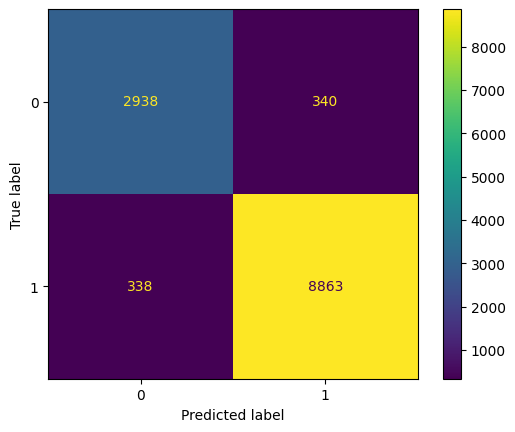

In [52]:
# Calculer les métriques
print("Matrice de confusion:")
cf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

cf_matrixD = ConfusionMatrixDisplay(cf_matrix)
cf_matrixD.plot()

In [53]:
# Prédire les classes pour les données de test
y_pred = grid_search.predict(X_test)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3278
           1       0.96      0.96      0.96      9201

    accuracy                           0.95     12479
   macro avg       0.93      0.93      0.93     12479
weighted avg       0.95      0.95      0.95     12479



In [54]:
import pickle

# Enregistre le modèle
with open('data/modele_usba.pkl', 'wb') as fichier_modele:
    pickle.dump(grid_search, fichier_modele)

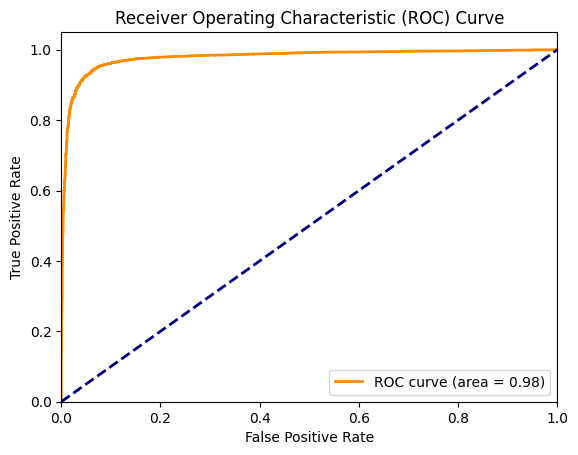

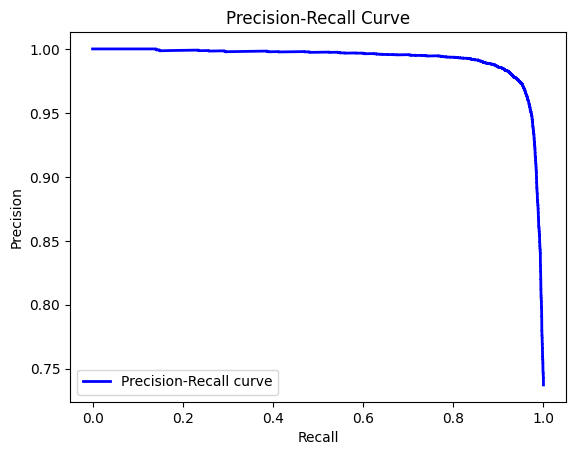

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Calculer les probabilités prédites pour la classe positive
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Courbe de précision-rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

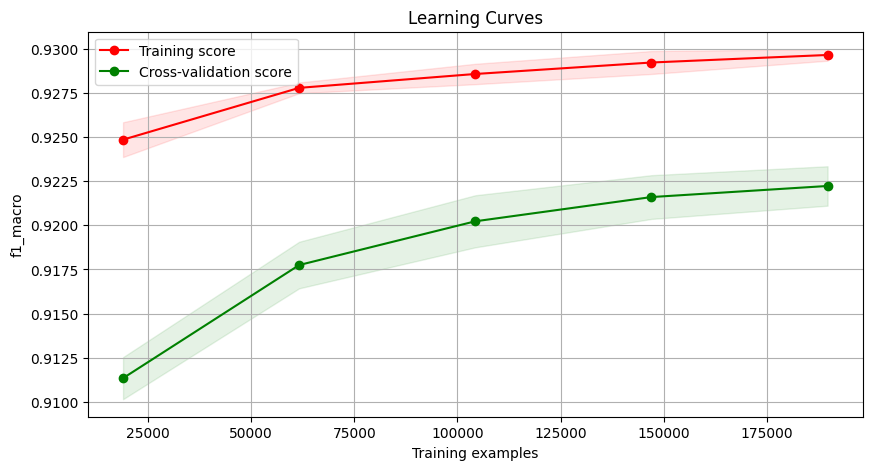

In [56]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay


train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(grid_search, X_train, y_train, cv=5, n_jobs=-1,
                   train_sizes=np.linspace(.1, 1.0, 5), return_times=True, scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

plt.figure(figsize=(10, 5))
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("f1_macro")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

plt.show()


In [57]:
#Obtenir les importances des caractéristiques du modèle XGBoost
pipeline_xgb.fit(X_train, y_train, )
feature_importances = pipeline_xgb.named_steps['classifier'].feature_importances_

#Obtenir les noms des caractéristiques transformées
feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

#Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#Afficher les importances des caractéristiques
importance_df.head(15)

,Feature,Importance
0,num__Term,0.224403
2,num__ApprovalFY,0.064310
4331,cat__Naics_Health care and social assistance,0.030387
4345,cat__RevLineCr_No,0.029632
4343,cat__UrbanRural_Rural Zone,0.020769
3,num__GrAppv,0.017431
4326,"cat__Naics_Agriculture, forestry, fishing and ...",0.014083
4324,cat__Naics_Accommodation and food services,0.011418
4347,cat__NewExist_Existing business,0.010872
4338,cat__Naics_Real estate and rental and leasing,0.008376


In [58]:
row_index_1 = df.loc[1]
print(row_index_1)

ApprovalDate               2006-02-07
Term                               83
NoEmp                              18
FranchiseCode            No franchise
Naics            Educational services
ApprovalFY                       2006
NewExist                 New business
LowDoc               Yes Loan Program
GrAppv                       10000000
CreateJob                           5
RetainedJob                        23
UrbanRural                 Urban Zone
RevLineCr                         Yes
MIS_Status                          1
Name: 1, dtype: object


In [59]:
import pandas as pd
import pickle


real_values = pd.DataFrame({
    'ApprovalDate': ['7-Feb-06'],
    'Term': [126],
    'NoEmp': [7],
    'FranchiseCode': ['No franchise'],
    'NAICS': ['Accommodation and food services'],
    'ApprovalFY': [2006],
    'NewExist': [' Existing business'],
    'LowDoc': ['Yes Loan Program'],
    'GrAppv': [13730000],
    'CreateJob': [0],
    'RetainedJob': [0],
    'UrbanRural': ['Urban Zone'],
    'RevLineCr': ['No']
})

input_data = pd.DataFrame(real_values, index=[0])



with open('data/modele.pkl', 'rb') as file:
    model = pickle.load(file)


y_pred_input = model.predict(input_data)



print("Prédictions:", y_pred_input)

Prédictions: [1]


In [60]:
import random
# Génération de valeurs aléatoires pour les différentes colonnes
random_values = {
    'ApprovalDate': [f"{random.randint(1, 28)}-{random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])}-06"],
    'Term': [random.randint(1, 200)],
    'NoEmp': [random.randint(1, 20)],
    'FranchiseCode': ['No franchise'],
    'NAICS': ['Accommodation and food services'],
    'ApprovalFY': [random.randint(2000, 2024)],
    'NewExist': [' Existing business'],
    'LowDoc': ['Yes Loan Program'],
    'GrAppv': [random.randint(10000, 10000000)],
    'CreateJob': [random.randint(0, 10)],
    'RetainedJob': [random.randint(0, 10)],
    'UrbanRural': ['Urban Zone'],
    'RevLineCr': ['No']
}

# Création d'un dataframe avec les valeurs aléatoires
input_data = pd.DataFrame(random_values)

# Chargement du modèle entraîné
with open('data/modele.pkl', 'rb') as file:
    model = pickle.load(file)

# Prédiction
y_pred_input = model.predict(input_data)

# Affichage des prédictions
print("Prédictions:", y_pred_input)

Prédictions: [1]
